In [1]:
include("Molecular_Dynamics.jl")
using DelimitedFiles

In [2]:
function main()
    g = 9.8
    K = 1e2
    dt = 0.0001
    m = 1
    rad = 1
    vel0 = 0.5
    N = 5
    tf = 20.0
    Dims = 2 
    
    data = []
    
    Lx = 40
    Ly = 40
    Nwalls = 4
    WallC = 1000
    push!(data,Atom([Lx+WallC*Ly, Ly/2]       ,WallC*m ,WallC*Ly)) #Right Wall
    push!(data,Atom([Lx/2       , Ly+WallC*Lx],WallC*m ,WallC*Lx)) #Upper Wall
    push!(data,Atom([-WallC*Ly  , Ly/2]       ,WallC*m ,WallC*Ly)) #Left Wall
    push!(data,Atom([Lx/2       , -WallC*Lx]  ,WallC*m ,WallC*Lx)) #Lower Wall
    
    c = Config(g,K,dt,Nwalls)

    for i in 1:N
        θ = 2*π*rand(Float64)
        x = rad+(Lx-rad)*rand(Float64)
        y = rad+(Ly-rad)*rand(Float64)
        
        push!(data,Atom([x,y],[vel0*cos(θ),vel0*sin(θ)],m,rad))
    end
    
    Propagate(data, c, tf, vis_steps=2000, file="data.csv")
    
    #read saved data
    data=readdlm("data.csv", ',')
    skips = 2*Dims+2
    
    gif = @gif for j in 1:size(data)[1]
        i=Nwalls+1
        scatter((data[j,2+skips*(i-1)],data[j,3+skips*(i-1)]), lims = (0, Ly))
        for i in Nwalls+1:N+Nwalls
            scatter!((data[j,2+skips*(i-1)],data[j,3+skips*(i-1)]))
        end
    end
    gif
end

main (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/wind/Desktop/gas/tmp.gif
└ @ Plots /home/wind/.julia/packages/Plots/yJrrq/src/animation.jl:137


Plots.AnimatedGif("/home/wind/Desktop/gas/tmp.gif")
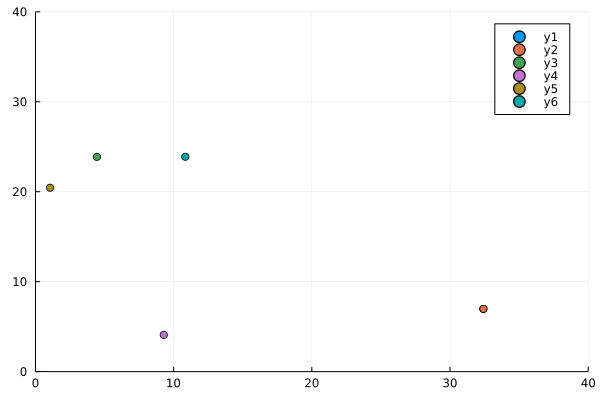

In [3]:
main()